In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [76]:
import openpyxl
import xlrd

In [77]:
df=pd.read_excel("weather.xlsx")

In [78]:
df

,Day,Outlook,Temperature,Humidity,Wind,Play
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Overcast,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes
5,6,Rain,Cool,Normal,Strong,No
6,7,Overcast,Cool,Normal,Strong,Yes
7,8,Sunny,Mild,High,Weak,No
8,9,Sunny,Cool,Normal,Weak,Yes
9,10,Rain,Mild,Normal,Weak,Yes


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          14 non-null     int64 
 1   Outlook      14 non-null     object
 2   Temperature  14 non-null     object
 3   Humidity     14 non-null     object
 4   Wind         14 non-null     object
 5   Play         14 non-null     object
dtypes: int64(1), object(5)
memory usage: 804.0+ bytes


In [80]:
df.columns

Index(['Day', 'Outlook', 'Temperature', 'Humidity', 'Wind', 'Play'], dtype='object')

In [81]:
for i in df:
    print("*" * 5,i, "*" * 5)
    print()
    print(df[i].unique())
    print()

***** Day *****

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]

***** Outlook *****

['Sunny' 'Overcast' 'Rain']

***** Temperature *****

['Hot' 'Mild' 'Cool']

***** Humidity *****

['High' 'Normal']

***** Wind *****

['Weak' 'Strong']

***** Play *****

['No' 'Yes']



### Marginal Probability

#### 1. What is the probability of getting rain tomorrow.

In [95]:
# Way1

sum(df["Outlook"] =="Rain") / len(df["Outlook"])

0.35714285714285715

In [96]:
# Way2

df["Outlook"].value_counts(normalize=True).loc["Rain"]

np.float64(0.35714285714285715)

#### 2. What is the probability of playing cricket tomorrow.

In [97]:
# Way1

sum(df["Play"] == "Yes") / len(df)

0.6428571428571429

In [98]:
# Way2
df["Play"].value_counts(normalize=True).loc["Yes"]

np.float64(0.6428571428571429)

#### 3. What is that temperature is not cool tomorrow.

In [99]:
# Way1

sum(df["Temperature"] != "Cool") / len(df)

0.7142857142857143

In [100]:
# Way2
1 - df["Temperature"].value_counts(normalize=True).loc["Cool"]

np.float64(0.7142857142857143)

### Joint Probability

#### 1. What is the probability of playing cricket and temperature is hot.

In [101]:
# Way1

sum((df["Play"] == "Yes") & (df["Temperature"] == "Hot")) / len(df) 

0.14285714285714285

In [102]:
# Way2
pd.crosstab(index=df["Play"],columns=df["Temperature"],normalize=True).loc["Yes","Hot"]

np.float64(0.14285714285714285)

#### 2. What is the probability of humidity is normal and temperature is cool.

In [103]:
# Way1

sum((df["Humidity"] == "Normal") & (df["Temperature"] == "Cool")) / len(df)

0.2857142857142857

In [104]:
# Way2
pd.crosstab(index=df["Humidity"],columns=df["Temperature"],normalize=True).loc["Normal","Cool"]

np.float64(0.2857142857142857)

### Conditional Probability

#### 1. What is the probability of playing cricket when it is raining.

In [107]:
pd.crosstab(index=df["Play"],columns=df["Outlook"],normalize="columns").loc["Yes","Rain"]

np.float64(0.6)

#### 2. What is the probability of not playimng cricket when humidity is high.

In [108]:
pd.crosstab(index=df["Humidity"],columns=df["Play"],normalize="index").loc["High","No"]

np.float64(0.5714285714285714)

### Visualization 

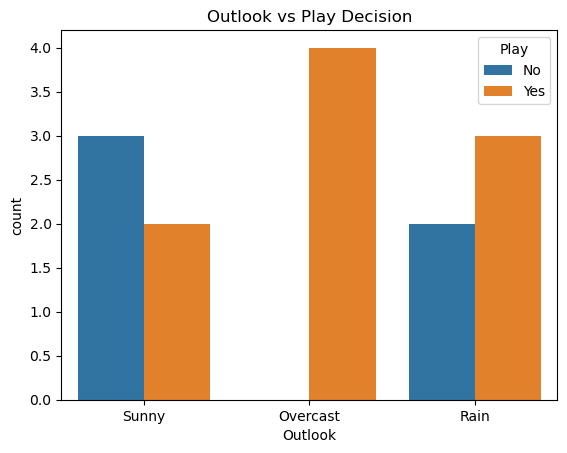

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='Outlook', hue='Play')
plt.title("Outlook vs Play Decision")
plt.show()